# **AIML Module Project - Neural Networks** - Total Score 60

## Lakshman Kumar S

# Part A - 30 Marks

• **DOMAIN:** Electronics and Telecommunication

• **CONTEXT:** A communications equipment manufacturing company has a product which is responsible for emitting informative signals. Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various parameters. 

• **DATA DESCRIPTION:** The data set contains information on various signal tests performed:

1. **Parameters:** Various measurable signal parameters.

2. **Signal_Quality:** Final signal strength or quality

• **PROJECT OBJECTIVE:** To build a classifier which can use the given parameters to determine the signal strength or quality.

### Steps and tasks: [ Total Score: 30 Marks]

#### 1. Data import and Understanding [10 Marks]


##### A. Read the ‘Signals.csv’ as DataFrame and import required libraries. [2 Marks]


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1) 
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

In [2]:
Data = pd.read_csv('Signals.csv')

In [3]:
Data.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
row, column = Data.shape
print('The dataset contains', row, 'rows and', column, 'columns')

The dataset contains 1599 rows and 12 columns


In [5]:
# Let's check the datatypes of the columns in the dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


There are 1599 observations and 12 columns in the data.

11 columns are of the float64 datatype and 1 column is int64.

##### B. Check for missing values and print percentage for each attribute. [2 Marks]


In [6]:
# Let's check for missing values in the data (in percentage)
Data.isnull().sum()* 100 / len(Data)

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

Thus, there are no missing values in the data for all columns

##### C. Check for presence of duplicate records in the dataset and impute with appropriate method. [2 Marks]


In [7]:
row, column = Data.shape
print('The dataset before dropping duplicates contains', row, 'rows and', column, 'columns')

The dataset before dropping duplicates contains 1599 rows and 12 columns


In [8]:
Data.duplicated().value_counts()

False    1359
True      240
dtype: int64

Thus, out of 1599 observations, 1359 observations are unique and 240 observations are duplicates. These records can be dropped.

In [9]:
Data= Data.drop_duplicates()

In [10]:
row, column = Data.shape
print('The dataset after dropping duplicates contains', row, 'rows and', column, 'columns')

The dataset after dropping duplicates contains 1359 rows and 12 columns


##### D. Visualise distribution of the target variable. [2 Marks]


In [11]:
Data["Signal_Strength"].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: Signal_Strength, dtype: int64

In [12]:
Data["Signal_Strength"].value_counts(1)

5    0.424577
6    0.393672
7    0.122884
4    0.038999
8    0.012509
3    0.007358
Name: Signal_Strength, dtype: float64

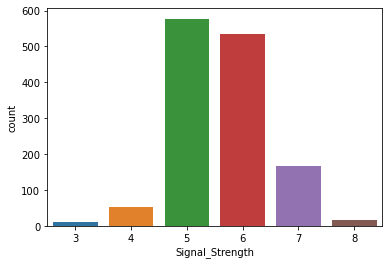

In [13]:
#plotting count of score
sns.countplot(data=Data , x='Signal_Strength')
plt.show()

Signal_Strength of 5 has the highest number of distribution and Signal_strength of 3 has the lowest number of distribution

##### E. Share insights from the initial data analysis (at least 2). [2 Marks]

In [14]:
# Let's view the statistical summary of the numerical columns in the data
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
Parameter 2,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
Parameter 3,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
Parameter 4,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
Parameter 5,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
Parameter 6,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
Parameter 7,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
Parameter 8,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
Parameter 9,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
Parameter 10,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


In [15]:
Data['Signal_Strength'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: Signal_Strength, dtype: int64

In [16]:
# Let's check the number of unique values in each column
Data.nunique()

Parameter 1         96
Parameter 2        143
Parameter 3         80
Parameter 4         91
Parameter 5        153
Parameter 6         60
Parameter 7        144
Parameter 8        436
Parameter 9         89
Parameter 10        96
Parameter 11        65
Signal_Strength      6
dtype: int64

Observations from initial data analysis:

1. All columns are numerical columns in the dataset.

2. The maximum number of Parameter 7 is 289, but at least 75% of Parameter 7 had its value within 63.

3. 50% of the rows have a Parameter 5 between 0.012 and 0.079, so the dataset is weighted towards the lower side with respect to this column.

4. 50% of the rows have a Signal_Strength between 6 and 8, so the dataset is weighted towards the higher side with respect to this column.

5. There are no columns with complete unique values. Hence we cannot drop any of these columns as it might add predictive power or value to the model.

6. The 'Parameter 8' column has highest number 436 unique categories.

7. In total, there are 6 classes [3, 4, 5, 6, 7, 8] in the target variable - Signal_Strength

#### 2. Data preprocessing [7 Marks]


##### A. Split the data into X & Y. [1 Marks]


In [17]:
## Separating Independent and Dependent Columns
X = Data.drop(['Signal_Strength'],axis=1)
Y = Data[['Signal_Strength']]

In [18]:
Y.head()

,Signal_Strength
0,5
1,5
2,5
3,6
5,5


##### B. Split the data into train & test with 70:30 proportion.[1 Marks]


In [19]:
# Splitting the dataset into the Training and Testing set.

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42,stratify = Y)

In [20]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(Data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(Data.index)) * 100))

69.98% data is in training set
30.02% data is in test set


In [21]:
# Checking that no column has missing values in train and test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Parameter 1     0
Parameter 2     0
Parameter 3     0
Parameter 4     0
Parameter 5     0
Parameter 6     0
Parameter 7     0
Parameter 8     0
Parameter 9     0
Parameter 10    0
Parameter 11    0
dtype: int64
------------------------------
Parameter 1     0
Parameter 2     0
Parameter 3     0
Parameter 4     0
Parameter 5     0
Parameter 6     0
Parameter 7     0
Parameter 8     0
Parameter 9     0
Parameter 10    0
Parameter 11    0
dtype: int64


##### C. Print shape of all the 4 variables and verify if train and test data is in sync. [1 Marks]


In [22]:
###Checking the shape of train and test sets
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(Y.shape)
print(y_train.shape)
print(y_test.shape)

(1359, 11)
(951, 11)
(408, 11)
(1359, 1)
(951, 1)
(408, 1)


In [23]:
print(X.shape[0])
print(X.shape[0] * 0.7)
print(X.shape[0] * 0.3)
print(Y.shape[0])
print(Y.shape[0] * 0.7)
print(Y.shape[0] * 0.3)

1359
951.3
407.7
1359
951.3
407.7


Thus, Shape of X is (1359,11) and of X_train is 70% of X which is (951,11) and X_test is 30% of X which is (408,11).

Thus, Shape of Y is (1359,1) and of y_train is 70% of Y which is (951,1) and y_test is 30% of Y which is (408,1).

In [24]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(Data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(Data.index)) * 100))

69.98% data is in training set
30.02% data is in test set


##### D. Normalise the train and test data with appropriate method. [2 Marks]


In [25]:
from sklearn.preprocessing import RobustScaler
# Applying RobustScaler to make it less prone to outliers
features = X.columns
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = features)
from scipy.stats import zscore
# Scaling the independent variables
Xs = X.apply(zscore)

display(X.shape, Xs.shape, Y.shape)

(1359, 11)

(1359, 11)

(1359, 1)

In [26]:
Xs.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1359.0,-6.311687e-16,1.000368,-2.137008,-0.697207,-0.236471,0.512226,4.370894
Parameter 2,1359.0,1.187832e-16,1.000368,-2.238023,-0.762323,-0.051800,0.604067,5.741690
Parameter 3,1359.0,-5.489845e-17,1.000368,-1.393258,-0.932817,-0.063094,0.806629,3.722758
Parameter 4,1359.0,8.349139e-17,1.000368,-1.200903,-0.461157,-0.239233,0.056665,9.599383
Parameter 5,1359.0,4.182739e-17,1.000368,-1.542254,-0.367182,-0.184843,0.058275,10.593400
Parameter 6,1359.0,-1.691068e-17,1.000368,-1.426094,-0.851570,-0.181291,0.488987,5.372442
Parameter 7,1359.0,3.567990e-17,1.000368,-1.222457,-0.743367,-0.264277,0.484301,7.251446
Parameter 8,1359.0,6.421157e-17,1.000368,-3.553604,-0.593582,-0.004789,0.594709,3.736721
Parameter 9,1359.0,-1.699238e-16,1.000368,-3.676535,-0.643871,0.001377,0.582100,4.518110
Parameter 10,1359.0,-1.367751e-16,1.000368,-1.926712,-0.637177,-0.226870,0.417898,7.862034


In [27]:
X_train, X_test, y_train, y_test = train_test_split(Xs,Y, test_size = 0.3, random_state = 42,stratify = Y)

In [28]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(Data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(Data.index)) * 100))

69.98% data is in training set
30.02% data is in test set


##### E. Transform Labels into format acceptable by Neural Network [2 Marks]

In [29]:
from sklearn.preprocessing import LabelEncoder
labelencoder_MD = LabelEncoder()
y_train=  labelencoder_MD.fit_transform(y_train)
y_test=  labelencoder_MD.transform(y_test)

In [30]:
# Convert to "one-hot" vectors using the to_categorical function
from tensorflow.keras.utils import to_categorical
num_classes = len(np.unique(y_test))
y_train = to_categorical(y_train, num_classes)
y_test_cat=to_categorical(y_test,num_classes)

In [31]:
y_train[1:5]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [32]:
y_test_cat[1:5]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [33]:
###Checking the shape of train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_test_cat.shape)

(951, 11)
(408, 11)
(951, 6)
(408,)
(408, 6)


#### 3. Model Training & Evaluation using Neural Network [13 Marks]


##### A. Design a Neural Network to train a classifier. [3 Marks]


In [34]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [35]:
# Initializing the ANN
model_a_1 = Sequential()
# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 64.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model_a_1.add(Dense(activation = 'relu', input_dim = 11, units=64))
#Add 1st hidden layer
model_a_1.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output 
# We use the softmax because we want many outcomes
model_a_1.add(Dense(6, activation = 'softmax')) 

In [36]:
# Create optimizer with default learning rate
# Compile the model
model_a_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
model_a_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                768       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total params: 3,046
Trainable params: 3,046
Non-trainable params: 0
_________________________________________________________________


##### B. Train the classifier using previously designed Architecture [2 Marks]


In [38]:
history=model_a_1.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
24/24 [==============================] - 0s 8ms/step - loss: 1.5180 - accuracy: 0.4237 - val_loss: 1.3250 - val_accuracy: 0.4869
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 1.2287 - accuracy: 0.5329 - val_loss: 1.1461 - val_accuracy: 0.5497
Epoch 3/50
24/24 [==============================] - 0s 2ms/step - loss: 1.1025 - accuracy: 0.5750 - val_loss: 1.0671 - val_accuracy: 0.5550
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 1.0399 - accuracy: 0.5816 - val_loss: 1.0299 - val_accuracy: 0.5654
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 1.0032 - accuracy: 0.6053 - val_loss: 1.0150 - val_accuracy: 0.5916
Epoch 6/50
24/24 [==============================] - 0s 2ms/step - loss: 0.9830 - accuracy: 0.6066 - val_loss: 1.0046 - val_accuracy: 0.5759
Epoch 7/50
24/24 [==============================] - 0s 2ms/step - loss: 0.9651 - accuracy: 0.6026 - val_loss: 0.9989 - val_accuracy: 0.5654
Epoch 8/50
24/24 [==

In [39]:
model_a_1.predict(X_test)

array([[4.2016199e-04, 1.3469023e-02, 7.6311034e-01, 2.2126688e-01,
        1.7284139e-03, 5.1441339e-06],
       [5.2684555e-03, 3.6877491e-02, 6.4783740e-01, 2.7994275e-01,
        2.9849611e-02, 2.2423863e-04],
       [3.8191221e-05, 8.3570700e-04, 2.5242023e-02, 5.7204676e-01,
        3.0312714e-01, 9.8710217e-02],
       ...,
       [8.4219212e-03, 2.3931514e-01, 2.4817346e-01, 8.0268152e-02,
        4.2308846e-01, 7.3283492e-04],
       [3.7782956e-07, 3.0952255e-04, 1.4036509e-01, 5.5008447e-01,
        3.0909294e-01, 1.4757202e-04],
       [6.6331559e-04, 2.7022140e-02, 6.8251950e-01, 2.8758186e-01,
        2.2109528e-03, 2.2947172e-06]], dtype=float32)

In [40]:
y_pred_a_1=model_a_1.predict(X_test)
y_pred_a_1 = (y_pred_a_1 > 0.5)
y_pred_a_1

array([[False, False,  True, False, False, False],
       [False, False,  True, False, False, False],
       [False, False, False,  True, False, False],
       ...,
       [False, False, False, False, False, False],
       [False, False, False,  True, False, False],
       [False, False,  True, False, False, False]])

In [41]:
# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
y_pred_a_1_final=[]
for i in y_pred_a_1:
  y_pred_a_1_final.append(np.argmax(i))

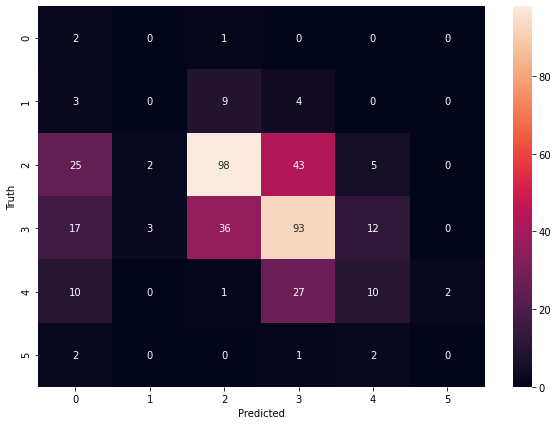

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test,y_pred_a_1_final)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_a_1_final))

              precision    recall  f1-score   support

           0       0.03      0.67      0.06         3
           1       0.00      0.00      0.00        16
           2       0.68      0.57      0.62       173
           3       0.55      0.58      0.57       161
           4       0.34      0.20      0.25        50
           5       0.00      0.00      0.00         5

    accuracy                           0.50       408
   macro avg       0.27      0.34      0.25       408
weighted avg       0.55      0.50      0.52       408



In [44]:
index = 0
misclassified_images = []
for label, predict in zip(y_test, y_pred_a_1_final):
    if label != predict: 
        misclassified_images.append(index)
    index +=1
print(misclassified_images)
print(len(misclassified_images))

[1, 3, 4, 10, 11, 12, 15, 16, 19, 20, 21, 23, 24, 25, 27, 30, 31, 33, 34, 35, 36, 38, 39, 41, 42, 43, 44, 49, 50, 51, 52, 53, 54, 55, 56, 59, 62, 64, 69, 70, 72, 74, 76, 77, 82, 86, 91, 93, 94, 96, 97, 98, 99, 100, 102, 103, 106, 107, 111, 115, 118, 122, 124, 125, 131, 142, 143, 144, 145, 146, 149, 150, 152, 154, 155, 156, 160, 161, 162, 163, 164, 167, 169, 170, 171, 175, 176, 178, 180, 183, 188, 194, 195, 199, 200, 203, 206, 207, 209, 210, 211, 213, 215, 218, 221, 222, 226, 227, 228, 230, 233, 235, 236, 237, 240, 242, 243, 244, 246, 248, 250, 253, 254, 255, 257, 259, 260, 262, 266, 267, 270, 273, 278, 279, 280, 282, 288, 289, 293, 299, 301, 302, 303, 304, 305, 306, 308, 309, 311, 314, 315, 317, 318, 319, 320, 321, 323, 324, 327, 328, 329, 330, 331, 332, 334, 336, 337, 338, 343, 344, 347, 348, 349, 352, 353, 354, 355, 357, 358, 360, 361, 363, 364, 365, 366, 370, 371, 372, 376, 378, 380, 383, 384, 385, 386, 388, 389, 390, 391, 392, 394, 397, 398, 401, 405]
205


##### C. Plot 2 separate visuals. [3 Marks]
##### i. Training Loss and Validation Loss
##### ii. Training Accuracy and Validation Accuracy


[1.0979797840118408, 0.5857843160629272]


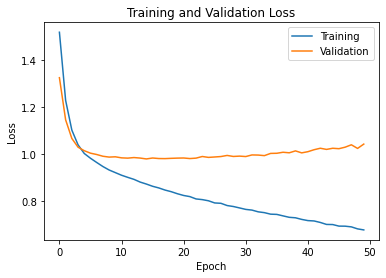

In [45]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting loss at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(("Training" , "Validation") , loc ='best')

#Printing results
results = model_a_1.evaluate(X_test, y_test_cat, verbose=False)
print(results)

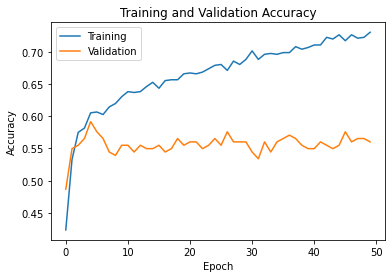

In [46]:
loss, accuracy  = model_a_1.evaluate(X_test, y_test_cat, verbose=False)
    
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()

From Training and Validation Loss plot, we could observe that the from Epoch 8, the validation loss remains the same whereas the training loss gets decreasing, this means the model is overfit during training stage.

From Training and Validation Accuracy plot, we could observe that the from Epoch 3, the validation accuracy has less oscilation whereas the training accuracy gets increasing, this also means the model is overfit during training stage.

To avoid overfitting we need to use Regularisation methods, in this case we are adopting dropout and batch normalization methods.

##### D. Design new architecture/update existing architecture in attempt to improve the performance of the model. [2 Marks]


To avoid overfitting we are using Regularisation methods, dropout and batch normalization.

After doing many trial and errors, for our case, Dropout with 0.7 suits the best for accuracy and also to avoid overfitting.

In [47]:
# create model
model_a_2 = Sequential()  

model_a_2.add(Dense(activation = 'relu', input_dim = 11, units=64))

model_a_2.add(Dense(256, activation='relu',kernel_initializer='he_uniform')) ###Multiple Dense units with Relu activation
model_a_2.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model_a_2.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model_a_2.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))

model_a_2.add(Dropout(0.8))
model_a_2.add(BatchNormalization())

model_a_2.add(Dense(num_classes, activation='softmax')) ### For multiclass classification Softmax is used 

In [48]:
# Create optimizer with default learning rate
# Compile the model
model_a_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
model_a_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                768       
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64)               

In [50]:
history=model_a_2.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
24/24 [==============================] - 0s 6ms/step - loss: 2.0873 - accuracy: 0.2250 - val_loss: 1.7654 - val_accuracy: 0.4084
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 1.8016 - accuracy: 0.3026 - val_loss: 1.5427 - val_accuracy: 0.4660
Epoch 3/50
24/24 [==============================] - 0s 2ms/step - loss: 1.7023 - accuracy: 0.3632 - val_loss: 1.3838 - val_accuracy: 0.5550
Epoch 4/50
24/24 [==============================] - 0s 2ms/step - loss: 1.5157 - accuracy: 0.4184 - val_loss: 1.2524 - val_accuracy: 0.5812
Epoch 5/50
24/24 [==============================] - 0s 2ms/step - loss: 1.4072 - accuracy: 0.4829 - val_loss: 1.2172 - val_accuracy: 0.5969
Epoch 6/50
24/24 [==============================] - 0s 2ms/step - loss: 1.2912 - accuracy: 0.5329 - val_loss: 1.1450 - val_accuracy: 0.6021
Epoch 7/50
24/24 [==============================] - 0s 2ms/step - loss: 1.2448 - accuracy: 0.5382 - val_loss: 1.0743 - val_accuracy: 0.5812
Epoch 8/50
24/24 [==

In [51]:
model_a_2.predict(X_test)

array([[0.00669032, 0.02771886, 0.63647527, 0.2898959 , 0.03594299,
        0.00327662],
       [0.00608501, 0.03009374, 0.6168591 , 0.30997816, 0.03369288,
        0.00329122],
       [0.00225471, 0.00686539, 0.02200025, 0.5304617 , 0.3927955 ,
        0.04562239],
       ...,
       [0.0115251 , 0.03726634, 0.2374476 , 0.52893203, 0.16497292,
        0.01985603],
       [0.00950722, 0.03226095, 0.2225456 , 0.5486695 , 0.16654183,
        0.02047492],
       [0.00524847, 0.02313763, 0.74663687, 0.20542136, 0.01758279,
        0.00197292]], dtype=float32)

In [52]:
y_pred_a_2=model_a_2.predict(X_test)
y_pred_a_2 = (y_pred_a_2 > 0.5)
y_pred_a_2

array([[False, False,  True, False, False, False],
       [False, False,  True, False, False, False],
       [False, False, False,  True, False, False],
       ...,
       [False, False, False,  True, False, False],
       [False, False, False,  True, False, False],
       [False, False,  True, False, False, False]])

In [53]:
# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
y_pred_a_2_final=[]
for i in y_pred_a_2:
  y_pred_a_2_final.append(np.argmax(i))

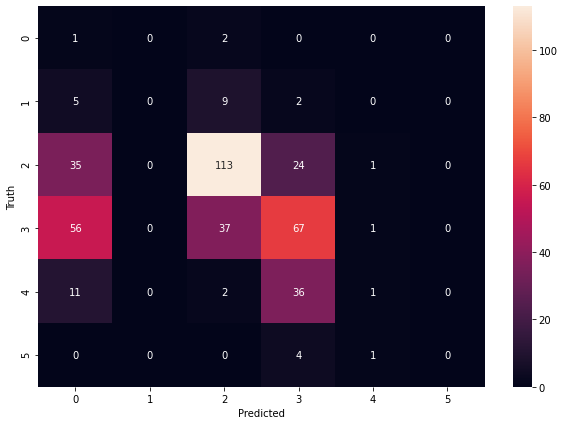

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test,y_pred_a_2_final)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_a_2_final))

              precision    recall  f1-score   support

           0       0.01      0.33      0.02         3
           1       0.00      0.00      0.00        16
           2       0.69      0.65      0.67       173
           3       0.50      0.42      0.46       161
           4       0.25      0.02      0.04        50
           5       0.00      0.00      0.00         5

    accuracy                           0.45       408
   macro avg       0.24      0.24      0.20       408
weighted avg       0.52      0.45      0.47       408



In [56]:
index = 0
misclassified_images = []
for label, predict in zip(y_test, y_pred_a_2_final):
    if label != predict: 
        misclassified_images.append(index)
    index +=1
print(misclassified_images)
print(len(misclassified_images))

[1, 3, 4, 5, 7, 9, 10, 12, 14, 16, 18, 19, 20, 23, 24, 25, 27, 30, 31, 34, 35, 36, 37, 39, 41, 42, 43, 44, 48, 49, 50, 51, 52, 53, 56, 58, 59, 60, 62, 64, 66, 68, 69, 70, 73, 74, 76, 82, 86, 89, 91, 93, 94, 96, 97, 98, 99, 100, 102, 103, 104, 106, 107, 108, 111, 112, 113, 115, 116, 118, 119, 122, 124, 125, 128, 130, 131, 136, 142, 143, 144, 146, 149, 150, 152, 154, 155, 156, 160, 162, 163, 164, 167, 168, 169, 173, 175, 178, 179, 180, 183, 186, 188, 195, 198, 199, 200, 201, 203, 206, 207, 209, 210, 211, 215, 216, 217, 218, 219, 221, 222, 226, 228, 230, 231, 233, 234, 235, 236, 240, 242, 244, 246, 248, 250, 252, 253, 254, 255, 257, 259, 260, 261, 263, 264, 267, 270, 273, 279, 285, 286, 288, 289, 291, 292, 293, 295, 296, 298, 299, 300, 301, 303, 304, 305, 309, 310, 314, 315, 316, 318, 319, 320, 321, 322, 323, 324, 327, 328, 329, 331, 332, 334, 336, 337, 338, 342, 343, 344, 345, 346, 348, 352, 353, 354, 357, 358, 360, 361, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 376, 378, 380, 38

##### E. Plot visuals as in Q3.C and share insights about difference observed in both the models. [3 Marks]

[1.0520598888397217, 0.5857843160629272]


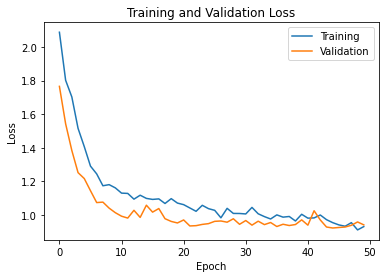

In [57]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting loss at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(("Training" , "Validation") , loc ='best')

#Printing results
results = model_a_2.evaluate(X_test, y_test_cat, verbose=False)
print(results)

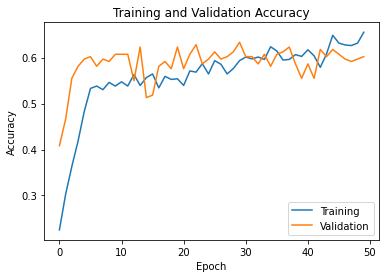

In [58]:
loss, accuracy  = model_a_2.evaluate(X_test, y_test_cat, verbose=False)
    
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()

Insights after comparing previous model and the final model:

**In previous model:**

We could observe that model with 2 hidden layers gave the accuracy of 0.5 and misclassification of 204. But, the issue is it is overfitting as we have not used any regularization methods.

From Training and Validation Loss plot, we could observe that the from Epoch 8, the validation loss remains the same whereas the training loss gets decreasing, this means the model is overfit during training stage.

From Training and Validation Accuracy plot, we could observe that the from Epoch 3, the validation accuracy has less oscilation whereas the training accuracy gets increasing, this also means the model is overfit during training stage.

To avoid overfitting we need to use Regularisation methods, in this case we are adopting dropout and batch normalization methods.

**In final model:**

After doing many trial and error, we could observe that model with 4 hidden layers and dropout of 0.8 and batch normalisation gave the best accuracy of 0.49 and misclassification of 207. The regularisation methods made sure that overfitting is avoided.

From Training and Validation Loss plot, we could observe that the at Epoch ~45, the validation loss and the training loss are same and least with value less than 1.0, this means the model is not overfitting or underfitting.

Similarly from Training and Validation Accuracy plot, we could observe that the at Epoch ~45, the validation accuracy and the training accuracy are same and highest with value ~55%, this also means model is not overfitting or underfitting.

# Part B - 30 Marks

• **DOMAIN:** Autonomous Vehicles

• **CONTEXT:** A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic images. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising numbers in photographs is a problem of interest to the optical character recognition community. While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements. 

The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

• **DATA DESCRIPTION:** The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

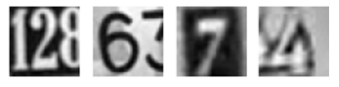

Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.

The dataset has been provided in the form of h5py files. You can read about this file format here: https://docs.h5py.org/en/stable/

Acknowledgement: Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised 

Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011. PDF
http://ufldl.stanford.edu/housenumbers as the URL for this site.

• **PROJECT OBJECTIVE:** To build a digit classifier on the SVHN (Street View Housing Number) dataset.

### Steps and tasks: [ Total Score: 30 Marks]

#### 1. Data Import and Exploration [5 Marks]


##### A. Read the .h5 file and assign to a variable. [2 Marks]


In [59]:
import h5py

In [60]:
hf = h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

##### B. Print all the keys from the .h5 file. [1 Marks]


In [61]:
print("List of keys from the Autonomous_Vehicles_SVHN_single_grey1.h5 files are:" , hf.keys())

List of keys from the Autonomous_Vehicles_SVHN_single_grey1.h5 files are: <KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


##### C. Split the data into X_train, X_test, Y_train, Y_test [2 Marks]


In [62]:
X_test = hf.get('X_test')
X_train = hf.get('X_train')
X_val = hf.get('X_val')
y_test = hf.get('y_test')
y_train = hf.get('y_train')
y_val = hf.get('y_val')

In [63]:
X_test = np.array(X_test)
X_train = np.array(X_train)
X_val = np.array(X_val)
y_test = np.array(y_test)
y_train = np.array(y_train)
y_val = np.array(y_val)

In [64]:
###Checking the shape of train and test sets
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(42000, 32, 32)
(60000, 32, 32)
(18000, 32, 32)
(42000,)
(60000,)
(18000,)


#### 2. Data Visualisation and preprocessing [13 Marks]


##### A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync. [1 Marks]


In [65]:
###Checking the shape of train and test sets
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(42000, 32, 32)
(60000, 32, 32)
(18000, 32, 32)
(42000,)
(60000,)
(18000,)


The value of X_train and y_train are 42000, X_test and y_test are 18000, X_val and y_val are 60000. 
Also, X_train + X_test 942000 + 18000 = 60000), where X_val shape is 60000.
Thus, all x, y, train, test are in sync.

Thus, the pixel size of X_train, X_val and X_test are uniform with value 32x32. Also, y_train, y_val and y_test data has only one column. Thus, all data splits are in sync.

##### B. Visualise first 10 images in train data and print its corresponding labels. [4 Marks]


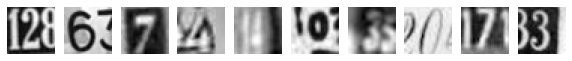

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [66]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

##### C. Reshape all the images with appropriate shape update the data in same variable. [3 Marks]


In [67]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(42000, 32, 32)
(60000, 32, 32)
(18000, 32, 32)


Based on the input data, we could observe that the vector size is of 32x32. So we need to reshape all the images (Flatten the images) with image vector size of 32x32, which is 1024 and need to update the same variable

In [68]:
# Flatten the images
image_vector_size = 32*32
X_train = X_train.reshape(X_train.shape[0], image_vector_size)
X_val = X_val.reshape(X_val.shape[0], image_vector_size)
X_test = X_test.reshape(X_test.shape[0], image_vector_size)

In [69]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(42000, 1024)
(60000, 1024)
(18000, 1024)


Thus, after reshaping the images got flatten and 1024 is the flattened image size

##### D. Normalise the images i.e. Normalise the pixel values. [2 Marks]


The pixel values ranges from 0-255 for each pixel. To normalize we will modify the range from 0-1, for which we need to divide each pixel value by 255.

In [70]:
# # normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

In [71]:
print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (42000, 1024) (42000,)
Validation set (60000, 1024) (60000,)
Test set (18000, 1024) (18000,)


##### E. Transform Labels into format acceptable by Neural Network [2 Marks]


In [72]:
# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_val_cat = to_categorical(y_val, num_classes)
y_test_cat=to_categorical(y_test,num_classes)

In [73]:
###Checking the shape of train and test sets after transforming the labels
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print(y_train.shape)
print(y_val_cat.shape)
print(y_test_cat.shape)
print(y_val.shape)
print(y_test.shape)

(42000, 1024)
(60000, 1024)
(18000, 1024)
(42000, 10)
(60000, 10)
(18000, 10)
(60000,)
(18000,)


In [74]:
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])

First 5 training lables as one-hot encoded vectors:
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [75]:
print("First 5 val lables as one-hot encoded vectors:\n", y_val[:5])

First 5 val lables as one-hot encoded vectors:
 [0 0 0 0 0]


In [76]:
print("First 5 test lables as one-hot encoded vectors:\n", y_test_cat[:5])

First 5 test lables as one-hot encoded vectors:
 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


##### F. Print total Number of classes in the Dataset. [1 Marks]


In [77]:
no_class = np.unique(y_test)
print("List of classes:" , no_class)

List of classes: [0 1 2 3 4 5 6 7 8 9]


In [78]:
print("Total Number of classes:" ,len(no_class))

Total Number of classes: 10


#### 3. Model Training & Evaluation using Neural Network [12 Marks]


##### A. Design a Neural Network to train a classifier. [3 Marks]


In [79]:
# define model

from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

image_size=32*32

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

# create model
model_b_1 = Sequential()  

model_b_1.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_shape=(image_size,)))
model_b_1.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model_b_1.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model_b_1.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model_b_1.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))

model_b_1.add(Dense(len(no_class), activation='softmax')) ### For multiclass classification Softmax is used 

In [80]:
# Compile model
#RMS_prop=optimizers.RMSprop()   ## we can similarly use different optimizers like RMSprop, Adagrad and SGD 
adam = optimizers.Adam(learning_rate=1e-3)
model_b_1.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy']) ### Loss function = Categorical cross entropy

In [81]:
## Looking into our base model
model_b_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
dense_1 (Dense)              (None, 160)               41120     
_________________________________________________________________
dense_2 (Dense)              (None, 224)               36064     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               28800     
_________________________________________________________________
dense_4 (Dense)              (None, 224)               28896     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2250      
Total params: 399,530
Trainable params: 399,530
Non-trainable params: 0
__________________________________________________

In [82]:
#Function to design model for hyperparameter tuning:
def create_model_v7(lr,batch_size):  
    backend.clear_session()
    #Fixing the seed for random number generators so that we can ensure we receive the same output everytime
    np.random.seed(42)
    import random
    random.seed(42)
    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_shape=(image_size,)))
    #model.add(Dropout(0.7))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.8))
    model.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.9))
    model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(num_classes, activation='softmax'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

##### B. Train the classifier using previously designed Architecture (Use best suitable parameters). [3 Marks]


## Base model without hyperparameter tuning

In [83]:
checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')

callbacks = [checkpoint,reduce_lr]

In [84]:
# Fit the model
history_1=model_b_1.fit(X_train, y_train, validation_split = 0.2, epochs=10, batch_size=128, verbose=2,callbacks=callbacks)

Epoch 1/10

Epoch 00001: saving model to model_weights.h5
263/263 - 1s - loss: 2.2636 - accuracy: 0.1319 - val_loss: 2.0179 - val_accuracy: 0.2335
Epoch 2/10

Epoch 00002: saving model to model_weights.h5
263/263 - 1s - loss: 1.4948 - accuracy: 0.4891 - val_loss: 1.2678 - val_accuracy: 0.5776
Epoch 3/10

Epoch 00003: saving model to model_weights.h5
263/263 - 1s - loss: 1.2140 - accuracy: 0.6003 - val_loss: 1.2039 - val_accuracy: 0.6007
Epoch 4/10

Epoch 00004: saving model to model_weights.h5
263/263 - 1s - loss: 1.0842 - accuracy: 0.6497 - val_loss: 1.0402 - val_accuracy: 0.6638
Epoch 5/10

Epoch 00005: saving model to model_weights.h5
263/263 - 1s - loss: 1.0003 - accuracy: 0.6815 - val_loss: 1.0307 - val_accuracy: 0.6702
Epoch 6/10

Epoch 00006: saving model to model_weights.h5
263/263 - 1s - loss: 0.9411 - accuracy: 0.6997 - val_loss: 0.8842 - val_accuracy: 0.7211
Epoch 7/10

Epoch 00007: saving model to model_weights.h5
263/263 - 1s - loss: 0.8966 - accuracy: 0.7140 - val_loss: 0

In [85]:
# predicting the model on test data
y_pred_b_1=model_b_1.predict(X_test)

In [86]:
y_pred_b_1[0]

array([0.07172018, 0.01970415, 0.19949186, 0.05265617, 0.03280478,
       0.07423389, 0.07497536, 0.00816771, 0.39883253, 0.06741329],
      dtype=float32)

In [87]:
# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
y_pred_b_1_final=[]
for i in y_pred_b_1:
  y_pred_b_1_final.append(np.argmax(i))

In [88]:
y_pred_b_1_final[0]

8

## Model with hyperparameter tuning

In [89]:
keras_estimator = KerasClassifier(build_fn=create_model_v7, verbose=2)

In [90]:
# define the grid search parameters
param_grid = {
    'batch_size':[64, 128],
    "lr":[ 0.001,0.01],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)
grid_result = grid.fit(X_train, y_train,validation_split = 0.2,verbose=2) 

Fitting 3 folds for each of 4 candidates, totalling 12 fits
525/525 - 3s - loss: 2.1816 - accuracy: 0.1713 - val_loss: 1.7286 - val_accuracy: 0.3590


In [91]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.132571 using {'batch_size': 64, 'lr': 0.001}


In [92]:
estimator_v7=create_model_v7(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

estimator_v7.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
dense_1 (Dense)              (None, 160)               41120     
_________________________________________________________________
dense_2 (Dense)              (None, 224)               36064     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               28800     
_________________________________________________________________
dense_4 (Dense)              (None, 224)               28896     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2250      
Total params: 399,530
Trainable params: 399,530
Non-trainable params: 0
__________________________________________________

In [93]:
checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')

callbacks = [checkpoint,reduce_lr]

In [94]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
estimator_v7.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_7=estimator_v7.fit(X_train, y_train, epochs=15, batch_size = grid_result.best_params_['batch_size'], verbose=2,validation_split=0.2, callbacks=callbacks)

Epoch 1/15

Epoch 00001: saving model to model_weights.h5
525/525 - 2s - loss: 2.1816 - accuracy: 0.1713 - val_loss: 1.7286 - val_accuracy: 0.3590
Epoch 2/15

Epoch 00002: saving model to model_weights.h5
525/525 - 2s - loss: 1.4897 - accuracy: 0.4816 - val_loss: 1.3925 - val_accuracy: 0.5227
Epoch 3/15

Epoch 00003: saving model to model_weights.h5
525/525 - 2s - loss: 1.2537 - accuracy: 0.5846 - val_loss: 1.2535 - val_accuracy: 0.5935
Epoch 4/15

Epoch 00004: saving model to model_weights.h5
525/525 - 2s - loss: 1.1235 - accuracy: 0.6322 - val_loss: 1.0524 - val_accuracy: 0.6644
Epoch 5/15

Epoch 00005: saving model to model_weights.h5
525/525 - 2s - loss: 1.0385 - accuracy: 0.6638 - val_loss: 1.0769 - val_accuracy: 0.6518
Epoch 6/15

Epoch 00006: saving model to model_weights.h5
525/525 - 2s - loss: 0.9905 - accuracy: 0.6799 - val_loss: 0.9673 - val_accuracy: 0.6861
Epoch 7/15

Epoch 00007: saving model to model_weights.h5
525/525 - 2s - loss: 0.9216 - accuracy: 0.7028 - val_loss: 0

In [95]:
y_pred_7=estimator_v7.predict(X_test)

In [96]:
y_pred_final_7=[]
for i in y_pred_7:
  y_pred_final_7.append(np.argmax(i))

In [97]:
y_pred_final_7[0]

2

##### C. Evaluate performance of the model with appropriate metrics. [2 Marks]


## Model without hyperparameter tuning

In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_b_1_final))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1814
           1       0.75      0.78      0.76      1828
           2       0.76      0.78      0.77      1803
           3       0.68      0.71      0.69      1719
           4       0.82      0.79      0.80      1812
           5       0.58      0.61      0.59      1768
           6       0.72      0.71      0.71      1832
           7       0.76      0.80      0.78      1808
           8       0.61      0.70      0.65      1812
           9       0.80      0.63      0.71      1804

    accuracy                           0.72     18000
   macro avg       0.73      0.72      0.72     18000
weighted avg       0.73      0.72      0.73     18000



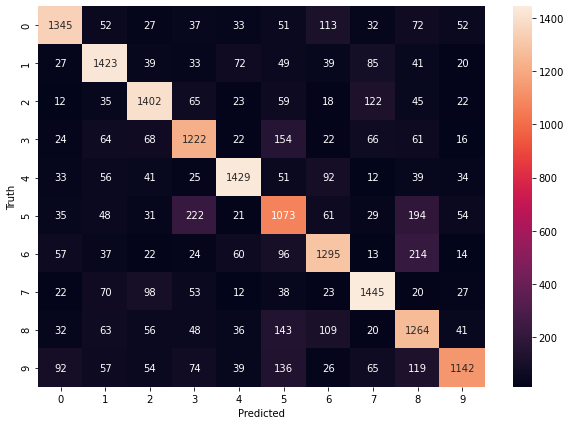

In [99]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test,y_pred_b_1_final)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [100]:
index = 0
misclassified_images = []
for label, predict in zip(y_test, y_pred_b_1_final):
    if label != predict: 
        misclassified_images.append(index)
    index +=1
print(misclassified_images)
print(len(misclassified_images))

[0, 1, 7, 8, 11, 12, 14, 18, 23, 24, 25, 26, 27, 33, 40, 45, 46, 54, 62, 68, 76, 79, 84, 85, 88, 89, 90, 92, 97, 98, 100, 102, 108, 120, 127, 132, 136, 137, 138, 142, 150, 151, 154, 155, 158, 161, 162, 163, 170, 173, 175, 176, 178, 184, 188, 194, 199, 200, 203, 210, 215, 222, 223, 228, 230, 232, 235, 239, 242, 251, 252, 253, 266, 267, 268, 272, 274, 278, 284, 301, 303, 304, 305, 306, 307, 317, 322, 323, 330, 337, 345, 346, 347, 351, 353, 356, 358, 363, 366, 372, 375, 392, 394, 396, 400, 403, 406, 411, 415, 418, 421, 426, 428, 429, 434, 437, 438, 439, 446, 448, 451, 453, 454, 456, 457, 460, 466, 468, 469, 484, 489, 490, 492, 496, 497, 498, 503, 504, 505, 507, 508, 510, 511, 517, 520, 524, 525, 527, 528, 530, 531, 532, 534, 535, 537, 542, 543, 547, 550, 551, 552, 556, 560, 562, 563, 579, 586, 590, 591, 592, 600, 604, 605, 612, 614, 615, 619, 620, 621, 624, 630, 633, 640, 648, 649, 661, 663, 664, 665, 671, 672, 678, 679, 689, 690, 691, 692, 694, 700, 704, 705, 706, 715, 722, 728, 738, 753

Was predicted  3
Was labeled  3
Predicted Probabilities:  [[1.5150120e-09 1.0447627e-09 5.1994697e-09 9.9999785e-01 2.0003489e-10
  2.0102495e-06 3.0795968e-09 1.4377974e-09 4.7505818e-08 1.4613940e-07]]


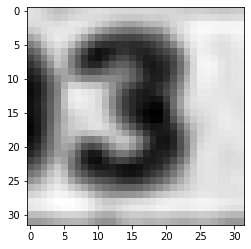

In [101]:
image_index = 445
plt.imshow(X_test[image_index].reshape(32, 32),cmap='Greys')
pred = model_b_1.predict(X_test[image_index].reshape(-1, 1024))
print("Was predicted ",pred.argmax())
print("Was labeled ",y_test[image_index])
print("Predicted Probabilities: ",pred)

## Model with hyperparameter tuning

In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final_7))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1814
           1       0.73      0.83      0.78      1828
           2       0.79      0.81      0.80      1803
           3       0.75      0.71      0.73      1719
           4       0.81      0.83      0.82      1812
           5       0.74      0.73      0.73      1768
           6       0.77      0.75      0.76      1832
           7       0.82      0.80      0.81      1808
           8       0.74      0.72      0.73      1812
           9       0.75      0.74      0.75      1804

    accuracy                           0.77     18000
   macro avg       0.77      0.77      0.77     18000
weighted avg       0.77      0.77      0.77     18000



In [103]:
from sklearn.metrics import confusion_matrix
cm_1=confusion_matrix(y_test,y_pred_final_7)

Text(69.0, 0.5, 'Truth')

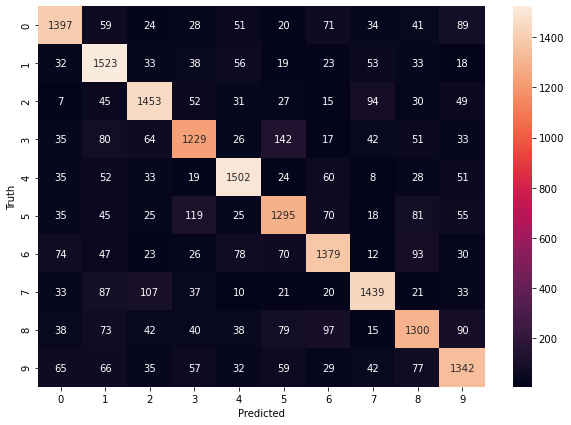

In [104]:
plt.figure(figsize=(10,7))
sns.heatmap(cm_1,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [105]:
index = 0
misclassified_images = []
for label, predict in zip(y_test, y_pred_final_7):
    if label != predict: 
        misclassified_images.append(index)
    index +=1
print(misclassified_images)
print(len(misclassified_images))

[0, 1, 7, 8, 11, 14, 23, 25, 27, 37, 40, 45, 46, 47, 56, 67, 68, 76, 89, 90, 92, 93, 96, 97, 98, 100, 102, 108, 109, 114, 120, 127, 132, 136, 137, 138, 140, 142, 150, 151, 152, 154, 155, 156, 158, 161, 163, 170, 175, 176, 177, 182, 183, 185, 188, 194, 200, 203, 207, 210, 222, 223, 230, 232, 235, 239, 242, 251, 252, 253, 267, 270, 274, 284, 290, 301, 303, 307, 323, 324, 337, 347, 351, 355, 356, 360, 363, 372, 374, 375, 396, 398, 400, 402, 414, 415, 418, 426, 428, 429, 432, 437, 446, 448, 451, 454, 456, 457, 466, 484, 489, 490, 492, 496, 497, 498, 503, 504, 505, 507, 510, 511, 516, 520, 523, 524, 527, 530, 532, 534, 535, 537, 543, 551, 556, 562, 563, 586, 590, 592, 600, 612, 617, 619, 621, 630, 633, 640, 648, 652, 663, 664, 665, 671, 672, 690, 691, 694, 698, 700, 704, 706, 710, 717, 728, 753, 755, 756, 765, 768, 771, 780, 783, 784, 787, 790, 795, 797, 799, 803, 808, 813, 814, 815, 817, 835, 838, 845, 849, 856, 860, 862, 865, 867, 869, 871, 872, 875, 879, 887, 895, 896, 907, 908, 926, 927

Was predicted  4
Was labeled  4
Predicted Probabilities:  [[0.00681585 0.00741961 0.00166622 0.00396774 0.96185493 0.0023834
  0.0022668  0.00112305 0.01041365 0.00208887]]


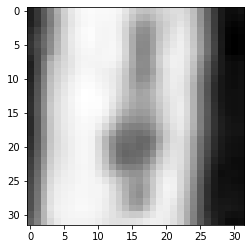

In [106]:
image_index = 115
plt.imshow(X_test[image_index].reshape(32, 32),cmap='Greys')
pred = estimator_v7.predict(X_test[image_index].reshape(-1, 1024))
print("Was predicted ",pred.argmax())
print("Was labeled ",y_test[image_index])
print("Predicted Probabilities: ",pred)

##### D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same. [4 Marks]

### Training loss, validation loss vs number of epochs before hyperparameter tuning

[0.8719114065170288, 0.7244444489479065]


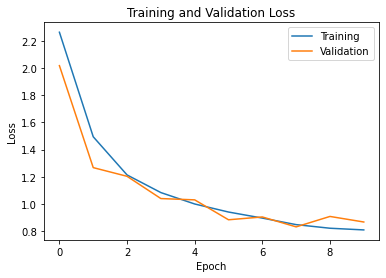

In [107]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_1.history)
hist['epoch'] = history_1.epoch

# Plotting loss at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(("Training" , "Validation") , loc ='best')

#Printing results
results = model_b_1.evaluate(X_test, y_test_cat, verbose=False)
print(results)

### Training accuracy, validation accuracy vs number of epochs before hyperparameter tuning

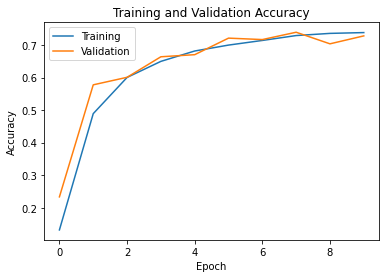

In [108]:
loss, accuracy  = model_b_1.evaluate(X_test, y_test_cat, verbose=False)
    
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()

### Training loss, validation loss vs number of epochs after hyperparameter tuning

[0.750493049621582, 0.769944429397583]


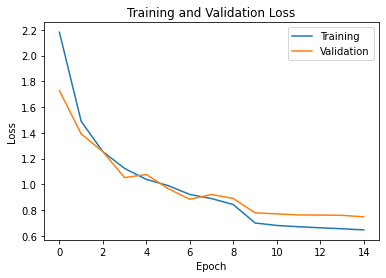

In [109]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_7.history)
hist['epoch'] = history_7.epoch

# Plotting loss at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(("Training" , "Validation") , loc ='best')

#Printing results
results = estimator_v7.evaluate(X_test, y_test_cat, verbose=False)
print(results)

### Training accuracy, validation accuracy vs number of epochs after hyperparameter tuning

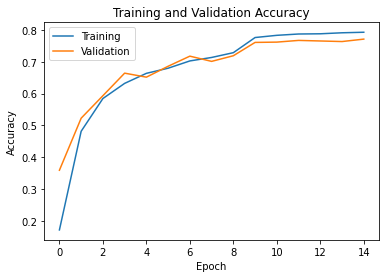

In [110]:
loss, accuracy  = estimator_v7.evaluate(X_test, y_test_cat, verbose=False)
    
plt.plot(history_7.history['accuracy'])
plt.plot(history_7.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()

### Observations on the traning, validation loss and accuracy vs no of Epoch plots:

1. We can observe that initial base model gave an accuracy of 0.72 and loss of 0.87 at Epoch = 10.
2. Based on the Training vs validation plot for both loss and accuracy, we can conclude that the train is similar to validation. Which implies the model is not overfit and therefore there is no need for regularization methods like dropout or batch normalization.
3. Thus, our base neural network model itself is the best model and we have 5 hidden layers apart from input and output layers.
4. After carrying out hyperparameter tuning, the best parameters we got was {'batch_size': 64, 'lr': 0.001}. And accuracy of 0.77 and loss of 0.75 is observed as the best in epoch = 14.
5. Based on the Training vs validation plot for both loss and accuracy for the final model after hyperparameter tuning, we can prove that the train results are similar to validation. This implies the model is not overfit and therefore there is no need for regularization methods like dropout or batch normalization.
6. Thus we achieve higher accuracy score of 80%.